Author: Fejiro Obor

# NLP With Hotel Reviews - Part 2

## Introduction

This deliverable aims to build upon the previous NLP with Hotel Reviews submission where the Positive & Negative reviews were combined with the numeric features using Count Vectorizer. The new dataset used in this deliverable was provided by the BrainStation team and has been cleaned/preprocessed beforehand. The goal of this deliverable is to develop several machine learning models with the aim of correctly labelling the sentiment of the hotel reviews.

### Data Dictionary

##### Column Name:  Description

_'Additional_Number_of_Scoring'_: Additional metric for measuring reviewer's hotel experience 

_'Average_Score'_: Average review score for each hotel
 
_'Review_Total_Negative_Word_Counts'_: Total word count of each negative review
 
_'Total_Number_of_Reviews'_: Total number of reviews left for each hotel
 
_'Review_Total_Positive_Word_Counts'_: Total word count of each positive review
 
_'Total_Number_of_Reviews_Reviewer_Has_Given'_: Total number of reviews a reviewer has left in the past
 
_'Reviewer_Score'_: Reviewer's score of their hotel experience ranging from 2 - 10
 
_'lat'_: Hotel Latitude
 
_'lng'_: Hotel Longitude
 
_'p__*'_: Dummy variables created from the individual words within the positive reviews
 
_'n__*'_: Dummy variables created from the individual words within the negative reviews
 
_'Hotel_Name__*'_: Dummy variables created from the individual Hotel Names
 
_'rating'_: This is the target column which is either '0' or '1' representing if the review is good or bad

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import timeit

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
# read in the csv files
train_data = pd.read_csv("clean_train_dataframe.csv")
test_data = pd.read_csv("clean_test_dataframe.csv")

In [4]:
# dimensions of the train data
train_data.shape

(12798, 2744)

In [5]:
# dimensions of the test data
test_data.shape

(4267, 2744)

In [6]:
len(test_data)/(len(train_data) + len(test_data))

0.2500439496044536

The two datasets provided have 2,744 columns with 12,798 and 4,267 rows respectively. The ratio of the train/test split is 75/25. We can take a quick look at the first few rows of the datasets:

In [7]:
train_data.head(3)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
test_data.tail(3)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
4264,581,8.4,16,1994,12,1,496,51.507894,-0.143671,4,...,0,0,0,0,0,0,0,0,0,1
4265,620,9.0,58,1974,24,11,131,51.506558,-0.004514,5,...,0,0,0,0,0,0,0,0,0,0
4266,744,8.3,7,2474,8,2,548,51.529142,-0.137278,1,...,0,0,0,0,0,0,0,0,0,1


Confirming if there are any null or duplicate data remaining in the dataset:

In [8]:
train_data.isnull().sum().sum()

0

In [9]:
test_data.isnull().sum().sum()

0

In [10]:
len(train_data[train_data.duplicated()])

0

In [11]:
len(test_data[test_data.duplicated()])

0

There are 0 rows of null or duplicate data within the datasets. Now that I have confirmed the datasets are clean, I can continue the modelling process.

In [12]:
train_data.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
count,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,...,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000,12798.000000
mean,741.061260,8.347750,19.291452,3021.224723,16.437647,5.082357,359.448742,51.511562,-0.134915,2.622050,...,0.001172,0.007345,0.075637,0.001641,0.005704,0.006095,0.001563,0.002422,0.001875,0.576106
std,601.768292,0.594369,30.523787,2407.720229,18.978319,8.046240,205.243217,0.018367,0.070260,2.108876,...,0.034217,0.088093,0.316115,0.045904,0.077360,0.082701,0.051521,0.050723,0.045036,0.494193
min,11.000000,6.400000,0.000000,49.000000,0.000000,1.000000,0.000000,51.420266,-0.369758,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,335.000000,8.000000,2.000000,1449.000000,5.000000,1.000000,182.000000,51.500961,-0.181389,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,531.000000,8.400000,10.000000,2312.000000,11.000000,2.000000,363.000000,51.510844,-0.136168,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,954.000000,8.800000,24.000000,3826.000000,21.000000,6.000000,532.000000,51.518856,-0.100472,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2682.000000,9.600000,403.000000,12158.000000,304.000000,173.000000,730.000000,51.606805,0.059042,6.000000,...,1.000000,2.000000,5.000000,3.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000


In [13]:
test_data.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
count,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,...,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000
mean,746.518163,8.347082,19.422311,3032.284040,16.260136,4.919147,355.043356,51.511344,-0.134247,2.589407,...,0.000469,0.006093,0.072416,0.000703,0.004453,0.005625,0.001172,0.002578,0.002578,0.576049
std,609.426996,0.602030,29.274398,2424.732703,19.150631,7.685281,202.717054,0.018176,0.071819,2.095507,...,0.021647,0.077830,0.304915,0.026509,0.070020,0.083670,0.034215,0.055143,0.055143,0.494241
min,18.000000,6.400000,0.000000,59.000000,0.000000,1.000000,0.000000,51.420266,-0.369758,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,8.000000,2.000000,1402.500000,5.000000,1.000000,185.000000,51.500961,-0.181389,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,541.000000,8.400000,10.000000,2312.000000,10.000000,2.000000,358.000000,51.510841,-0.136603,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,974.000000,8.800000,25.000000,3826.000000,21.000000,5.000000,527.000000,51.517972,-0.099716,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2682.000000,9.600000,359.000000,12158.000000,371.000000,92.000000,730.000000,51.606805,0.059042,6.000000,...,1.000000,1.000000,4.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000


From the descriptive statistics above, it can be seen that the scale of each of the features differ. The vectorized words and the target colum fall within the range of 0-1 while the other columns have much larger values. This will be an issue for distance-based algorithms like KNN, etc.

The StandardScaler is commonly used to standardize or rescale features in a dataset. I will use it to transform the data so that each feature is on a similar scale.  By standardizing the features, each will have a mean of 0 and a standard deviation of 1. It will avoid dominance of certain features solely based on their scale and will allow the algorithms to give equal importance to each feature.

## Modeling

In [14]:
# Define our X and y
y_train = train_data['rating']
y_test = test_data['rating']

X_train = train_data.drop(columns = 'rating')
X_test = test_data.drop(columns = 'rating')
features_Names = X_train.columns

In [15]:
X_train.shape

(12798, 2743)

In [16]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression Model

#### Q 1a. Employ a linear classifier on this dataset: Fit a logisitic regression model to this data with the solver set to 'lbfgs'. What is the accuracy score on the test set?

In [17]:
logreg_model = LogisticRegression(solver='lbfgs')
logreg_model.fit(X_train, y_train)

#Scoring the Logistic Regression model
print(f'Train Score: {logreg_model.score(X_train, y_train)}')
print(f'Test Score: {logreg_model.score(X_test, y_test)}')

Train Score: 0.8860759493670886
Test Score: 0.7328333723927818


The baseline logistic regression model had an accuracy of 88.6% on the train dataset and 73.3% accuracy on the test dataset.

#### Q 1b. What are the 20 words most predictive of a good review (from the positive review column)?   What are the 20 words most predictive with a bad review (from the negative review column)?  Use the regression coefficients to answer this question

In [70]:
# looking at the coefficients from the LogisticRegression model above
logreg_model.coef_

array([[-0.02299382,  0.47988299,  0.28576254, ...,  0.12776648,
        -0.0201696 ,  0.01179219]])

In [20]:
# Create a dataframe of the coefficients and feature names
feature_coeff = pd.DataFrame(features_Names, columns=['Features Names'])
feature_coeff['Coefficients'] = pd.DataFrame(logreg_model.coef_).transpose()[0]
feature_coeff.head(5)


,Features Names,Coefficients
0,Additional_Number_of_Scoring,-0.022994
1,Average_Score,0.479883
2,Review_Total_Negative_Word_Counts,0.285763
3,Total_Number_of_Reviews,-0.034038
4,Review_Total_Positive_Word_Counts,-0.188445


In [21]:
# Extract top 20 predictive features beginning with p_
top_20_pos_features = feature_coeff[feature_coeff['Features Names'].str.startswith('p_')].sort_values('Coefficients',\
                                                                                ascending=False).head(20)
top_20_pos_features.head(5)

,Features Names,Coefficients
812,p_gift,0.541586
733,p_excellent,0.517700
880,p_incredible,0.451323
731,p_exceed,0.416770
874,p_impeccable,0.404089


In [22]:
# Extract top 20 predictive features beginning with n_
top_20_neg_features = feature_coeff[feature_coeff['Features Names'].str.startswith('n_')].sort_values('Coefficients',\
                                                                                ascending=True).head(20)
top_20_neg_features.head(5)

,Features Names,Coefficients
2310,n_premier,-0.802297
2167,n_moment,-0.744598
2729,n_wood,-0.577219
1691,n_confirmation,-0.525449
2539,n_star,-0.513716


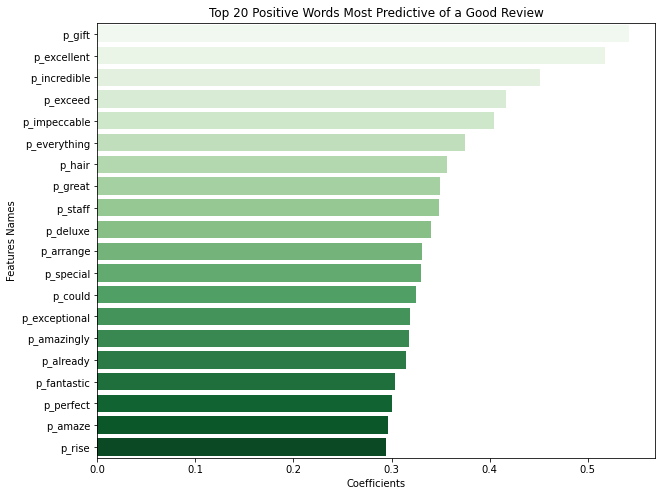

In [23]:
# plotting the top 20 positive words most predictive of a good review
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficients', y='Features Names', data=top_20_pos_features, palette='Greens')
plt.title('Top 20 Positive Words Most Predictive of a Good Review')
plt.show()

The plot above showcases the top 20 positive words most indicative of a good review based on the coefficients obtained from fitting the baseline Logistic Regression Model above. From the first plot, we can see that the odds of a review being good are increased if the review contains words such as 'Gift', 'Excellent', 'Incredible', 'Exceed', etc.

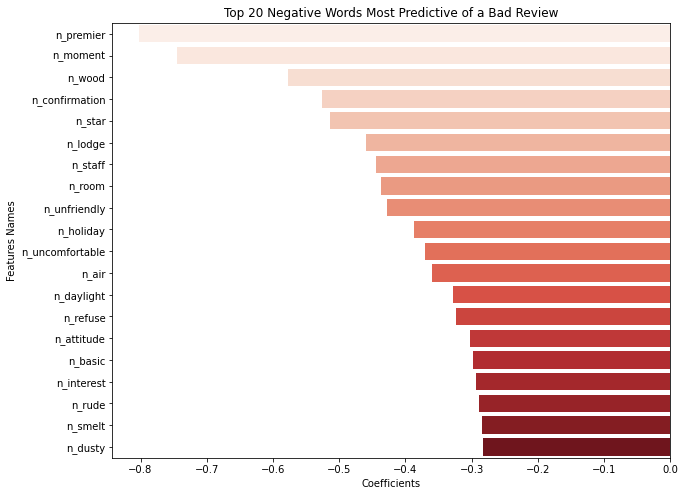

In [24]:
# plotting the top 20 negative words most predictive of a bad review
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficients', y='Features Names', data=top_20_neg_features, palette='Reds')
plt.title('Top 20 Negative Words Most Predictive of a Bad Review')
plt.show()

Conversely, the plot above showcases the top 20 negative words most indicative of a bad review. We can see that the odds of a review being bad are increased if the negative review contains words such as 'Dusty', 'Smelt', 'Rude', etc.

#### Q 1c. Reduce the dimensionality of the dataset using PCA, what is the relationship between the number of dimensions and run-time for a logistic regression?

Firstly, fitting the PCA object and using it to transform the train & test datasets:

In [25]:
# Instantiating & fitting the PCA model to the X_train and generating the same number of PCs as the dataset's features 
reviews_PCA = PCA()
reviews_PCA.fit(X_train)

# transform data 
X_train_PCA = reviews_PCA.transform(X_train)
X_test_PCA = reviews_PCA.transform(X_test)

Next, we can make a line plot below to explore how each Principal component contributes to the explained variance ratios

In [26]:
expl_variance = reviews_PCA.explained_variance_ratio_
expl_variance

array([7.63785922e-03, 4.72719774e-03, 2.18023902e-03, ...,
       1.12967864e-35, 7.29269371e-36, 1.95138780e-36])

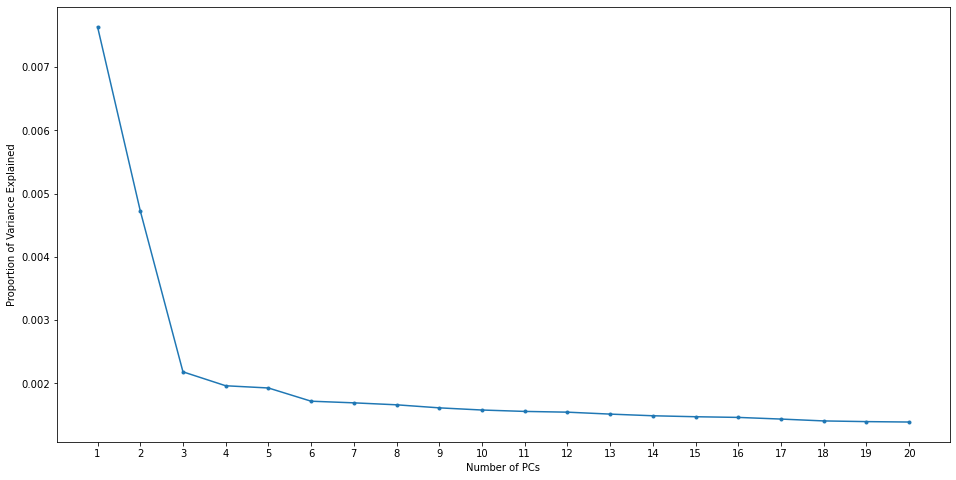

In [27]:
plt.figure(figsize = (16,8))
plt.plot(range(1, 21, 1), expl_variance[:20],marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,21,1))
plt.show()

From the elbow/scree plot shown above, we can see that the explained variance ratio is quite low for each of the individual Principal Components shown. For instance, only 0.7% of the variation in the data is seen in the direction of the first PC.

Although the plot forms an 'elbow' around 3 to 6 Principal Components and the amount of additional variance provided by subsequent PCs becomes very small, we can also see that we need far more than 6 PC's to capture a sufficient amount of variance from the original dataset.

In [28]:
# Checking how much of the variance in our dataset is captured by the principal components by taking a 
# cumulative sum of the explained variance ratios

expl_variance = reviews_PCA.explained_variance_ratio_

cumulative_sum = np.cumsum(expl_variance)
cumulative_sum

array([0.00763786, 0.01236506, 0.0145453 , ..., 1.        , 1.        ,
       1.        ])

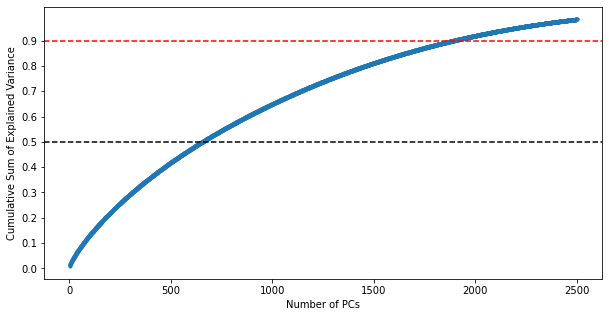

In [29]:
# Visualizing the cumulative sum on a plot

plt.figure(figsize = (10,5))
plt.plot(range(1, 2501, 1), cumulative_sum[:2500], marker='.')
plt.axhline(0.9, c='r', linestyle='--')
plt.axhline(0.5, c='k', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.yticks(np.arange(0.0, 1.0, 0.1))
plt.show()

It is expected that the run-time for logistic regressions will increase depending on the number of dimensions we decide to keep in the dataset due to the increased computations and memory required.

In [30]:
# Proceeding by keeping keeping 50% of the variance
reviews_PCA = PCA(n_components = 0.5)
reviews_PCA.fit(X_train)

# Transform train and test
X_train_PCA = reviews_PCA.transform(X_train)
X_test_PCA = reviews_PCA.transform(X_test)
X_train_PCA.shape

(12798, 655)

In [31]:
%%timeit
logreg_model_PCA = LogisticRegression(solver='lbfgs')
logreg_model_PCA.fit(X_train_PCA, y_train)

73.1 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


If we decided to keep 50% of the variance of the original dataset, the number of features reduces from 2743 to 655 principal components. The run-time to fit the Logistic Regression as seen above was 73.1 milliseconds.

On the other hand, if we decided to keep 90% of the variance of the original dataset, the run-time would be:

In [32]:
# Keeping 90% of the variance
reviews_PCA = PCA(n_components = 0.9)
reviews_PCA.fit(X_train)

# Transform train and test
X_train_PCA = reviews_PCA.transform(X_train)
X_test_PCA = reviews_PCA.transform(X_test)
X_train_PCA.shape

(12798, 1891)

In [33]:
%%timeit
logreg_model_PCA = LogisticRegression(solver='lbfgs')
logreg_model_PCA.fit(X_train_PCA, y_train)

771 ms ± 2.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [66]:
((771-73.1)/73.1)*100

954.7195622435021

As seen above, the run-time increased to 771 milliseconds as we increased the dimensions from 655 PC's to 1891 PC's. At the expense of preserving more of the original dataset's varaince, we increased the run time by 955%. As expected, the run-time increases as the dataset's dimensions increase.

#### Q 1d. List one advantage and one disadvantage of dimensionality reduction

An advantage of dimensionality reduction is:
- the improved computational efficiency when fitting the model. The training time and memory requirements required will be reduced for a smaller number of features.

A disadvantage of dimensionality reduction is:
- we are potentially losing important information by reducing the dimensionality of the dataset. This can lead to problems when the model is exposed to new data. By looking at the cumulative sum of the explained variance ratios, we can ensure the model training still captures most of the variance within the original dataset.

### K-Nearest Neighbour Model

#### Q2.a Employ a K-Nearest Neighbour classifier on this dataset:

#### Fit a KNN model to this data. What is the accuracy score on the test set?

In [34]:
# Instantiate & fit the model

KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

# Score the model
print("Number of neighbors:", KNN_model.n_neighbors)
print("Train accuracy:", KNN_model.score(X_train, y_train))
print("Test accuracy:", KNN_model.score(X_test, y_test))

Number of neighbors: 5
Train accuracy: 0.751211126738553
Test accuracy: 0.6367471291305367


Using a baseline KNN classifier with 5 number of neighbours, the model achieved 75.1% accuracy on the train dataset. On the other hand, it scored lower on the test dataset with an accuracy of 63.7%.

#### Q2.b KNN is a computationally expensive model. Reduce the number of observations (data points) in the dataset. What is the relationship between the number of observations and run-time for KNN?

In [35]:
%%timeit
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

6.61 ms ± 53.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
run_time = []
no_observations = []

# get the run time to fit a KNN model for different no. of observations by keeping within 1-100% of the entire dataset
for i in range(1, 100, 4):
    n = int(len(X_train) * (i/100))
    t = timeit.timeit(lambda: KNeighborsClassifier().fit(X_train[:n], y_train[:n]), number = 1)
    run_time.append(t)
    no_observations.append(n)
#     print(n)
#     print(t)

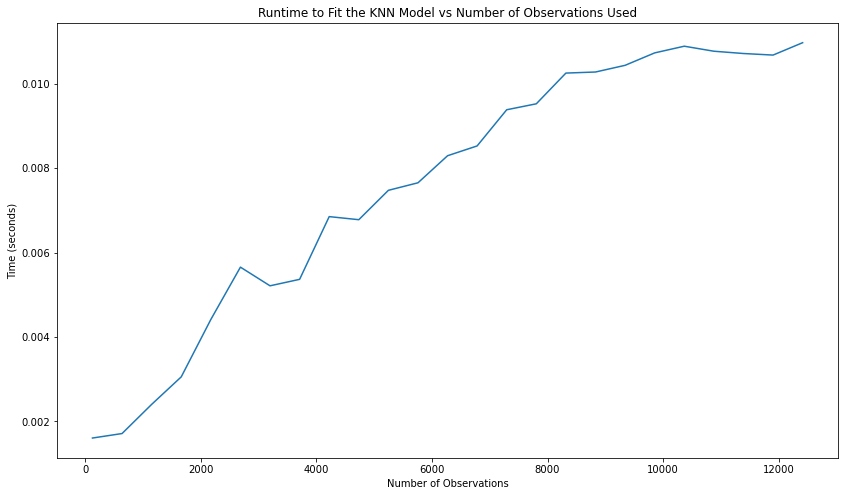

In [37]:
# plotting the % of the observations vs the time it takes to fit the KNN model
plt.figure(figsize=(14, 8))
plt.plot(no_observations, run_time)
plt.title('Runtime to Fit the KNN Model vs Number of Observations Used')
plt.ylabel('Time (seconds)')
plt.xlabel('Number of Observations')
plt.show()

- From the plot above, it can be seen that the number of seconds required to fit the KNN model increases as the number of observations in our dataset increases. This is expected given that the number of computations required by the KNN model increases as we increase the total number of data points to compare against in finding the nearest neighbour.

#### Q2.c List one advantage and one disadvantage of reducing the number of observations.

- An advantage of reducing the number of observations before fitting a KNN is that the computational costs decreases. This is vital for large datasets especially, since the number of distance calculations and comparisons required to make each prediction reduces.

- On the other hand, by reducing the number of observations, we could be losing some relevant information that would otherwise have been used to train the model. Excluding some datapoints means we may not be capturing the model's full variance and complexity. 

#### Q2.d Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets.

In [38]:
# Splitting the train set further into train/validation set using a 70:30 split
X_train_set, X_validation_set, y_train_set, y_validation_set = \
    train_test_split(X_train, y_train, test_size = 0.3,
                     random_state=1, stratify=y_train)

In [39]:
X_train_set.shape

(8958, 2743)

For varying number of neighbours between 1 to 100, we can look at the KNN model's accuracy on the train and validation sets as shown below:

In [41]:
n_values = np.arange(1, 100, 2)
train_scores = []
validation_scores = []

# for varying number of neighbours between 1 - 100
for n in n_values:  
    KNN_model = KNeighborsClassifier(n_neighbors = n)
    KNN_model.fit(X_train_set, y_train_set)
    
    # Scoring the models
    train_scores.append(KNN_model.score(X_train_set, y_train_set))
    validation_scores.append(KNN_model.score(X_validation_set, y_validation_set))
 

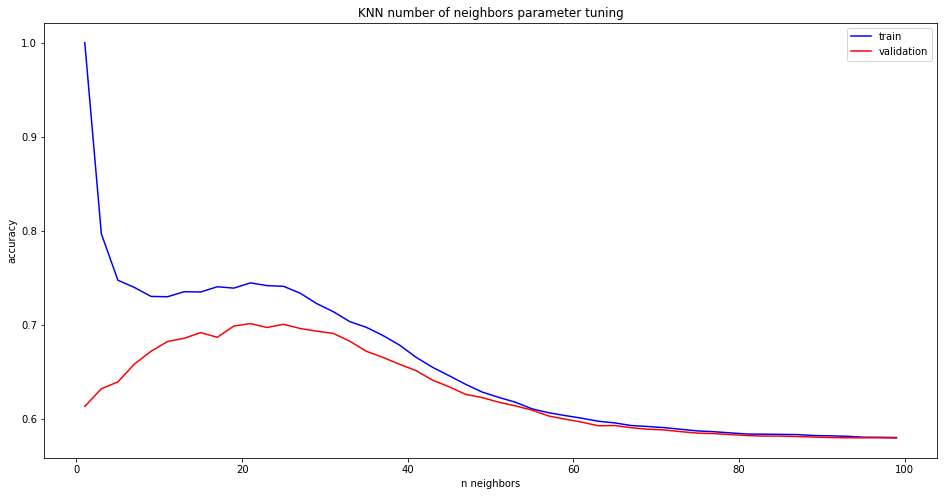

In [42]:
# Visualizing the model's performance on both the train/test sets
plt.figure(figsize=(16, 8))
plt.plot(n_values, train_scores, c='blue', label='train')
plt.plot(n_values, validation_scores, c='red', label='validation')
plt.xlabel('n neighbors')
plt.ylabel('accuracy')
plt.title("KNN number of neighbors parameter tuning")
plt.legend()
plt.show()

In [43]:
# the best value for K
index_of_max_k = np.argmax(validation_scores)
best_k = n_values[index_of_max_k]
print('The best value for K is: ', best_k)

The best value for K is:  21


From the plot above, we can see that the model's maximum accuracy on the validation dataset was achieved by looking at the 21 nearest neighbours. Next we can see how a KNN model with n=21 performs on the test set:

In [44]:
# Evaluating the optimal model's performance on the original train & test set

KNN_model = KNeighborsClassifier(n_neighbors = best_k)
KNN_model.fit(X_train, y_train)

print("Number of neighbors:", KNN_model.n_neighbors)
print("Test accuracy:", KNN_model.score(X_test, y_test))

Number of neighbors: 21
Test accuracy: 0.6878368877431451


As seen above, the optimized KNN model with n=21 neighbours achieved 68.8% accuracy on the test data set. This is an improved performance compared to the baseline KNN model with n=5 neighbours which achieved 63.7% accuracy.

#### Q2.e What is the issue with splitting the data into train and validation sets after performing vectorization?

One issue with splitting the data into train and validation sets after performing vectorization is that we will introduce information about the validation set to our training set. In other words, we will create a biased model because of data leakage between the train & validation sets. Due to this, our model will likley have a high performance when tested on the validation set.

### Decision Tree Model

#### Q3.a Employ a Decision Tree classifier on this dataset:

#### Fit a decision tree model to this data. What is the accuracy score on the test set?

In [45]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Score the model
print("Train accuracy:", tree_model.score(X_train, y_train))
print("Test accuracy:", tree_model.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.6993203655964377


The baseline Decision Tree model scored roughly 70% accuracy on the test dataset. As expected, the accuracy score on the test set is lower than on the train set due to the fact that Decision Tree models are prone to overfitting.

#### Q3.b Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.

Using the previously split train & validation sets, we can try to find the optimal value for the maximum depth of the decision tree as shown below:

In [46]:
depth_values = list(range(1, 30, 1))
train_scores = []
validation_scores = []


for depth in depth_values:  
    tree_model = DecisionTreeClassifier(max_depth = depth)
    tree_model.fit(X_train_set, y_train_set)
    
    # Scoring the models
    train_scores.append(tree_model.score(X_train_set, y_train_set))
    validation_scores.append(tree_model.score(X_validation_set, y_validation_set))
 

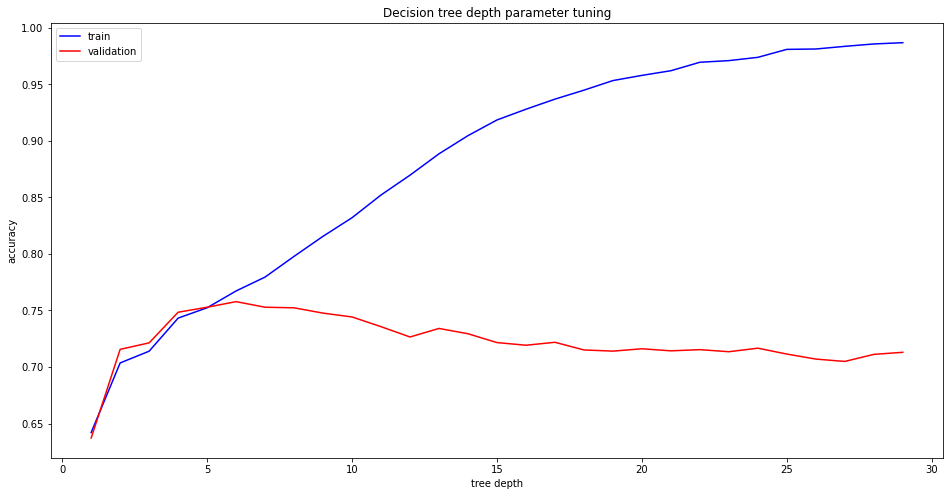

In [47]:
plt.figure(figsize=(16, 8))
plt.plot(depth_values, train_scores, c='blue', label='train')
plt.plot(depth_values, validation_scores, c='red', label='validation')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.title("Decision tree depth parameter tuning")
plt.legend()
plt.show()

In [48]:
# the best tree depth
index_of_max_depth = np.argmax(validation_scores)
best_depth = depth_values[index_of_max_depth]
print('The optimal Decision Tree depth to use would be: ', best_depth)

The optimal Decision Tree depth to use would be:  6


From the plot above, we can see that the maximum accuracy on the validation set occurs at a tree depth of 6. At this point, we also minimize the difference between the accuracies on the train and validation sets. For optimal results, a maximum depth of 6 would be recommended.

In [49]:
tree_model = DecisionTreeClassifier(max_depth = best_depth)
tree_model.fit(X_train, y_train)

# Score the model
print("Optimal Decision Tree Train accuracy:", tree_model.score(X_train, y_train))
print("Optimal Decision Tree Test accuracy:", tree_model.score(X_test, y_test))

Optimal Decision Tree Train accuracy: 0.7666822941084545
Optimal Decision Tree Test accuracy: 0.7520506210452308


After hyperparameter tuning to optimize the Decision Tree's depth, we were able to increase the accuracy score on the test set from 69.9% with using the baseline model to 75.2%.

#### Q3.c Provide two advantages of decision trees over KNN. Provide two weaknesses of decision trees (classification or regression trees)

Advantages of using Decision Trees over KNN include:
- Decision Trees are more easily interpretable compared to KNN. The Decision Tree can be easily represented in an intuitive tree-like structure that breaks down the decision making process.
- Decision trees are non-parametric models which are better at capturing non-linear decision boundaries and highlighting this within our dataset.

Weaknesses of Decision Trees include:
- They are prone to overfitting especially if the max depth is not specified.
- They are highly sensitive to variations in the training data which can cause issues when integrating them into ensemble methods or when working with noisy data.

#### Q4. What is the purpose of the validation set, i.e., how is it different than the test set?

The validation set is typically used for model selection and hyperparameter tuning during the model development phase. Before a final model is selected, we would use the validation set to confirm or compare performance of various models.

On the other hand, the test set is used after the final model has been decided. This set of data is typically used to evaluate the model's performance on real-world/un-seen data.

## Model Optimization

#### Q5a. Re-run a decision tree or logistic regression on the data again:  Perform a 5-fold cross validation to optimize the hyperparameters of your model.

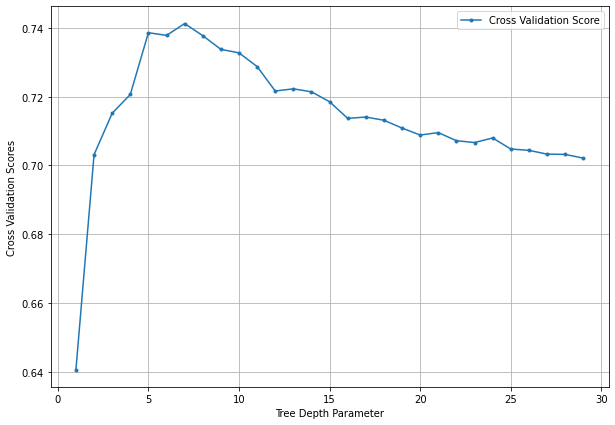

The best model has depth =  7


In [50]:
cross_validation_scores = []

depth_values = list(range(1, 30, 1))

# get the cross-val score for tree depth values between 1-30
for depth in depth_values:
    tree_model = DecisionTreeClassifier(max_depth = depth)
    cv_score = np.mean(cross_val_score(tree_model, X_train, y_train, cv = 5))
    cross_validation_scores.append(cv_score)

plt.figure(figsize=(10, 7))
plt.plot(depth_values, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xlabel('Tree Depth Parameter')
plt.ylabel('Cross Validation Scores')
plt.grid()
plt.show()

# Use the index for the max cross-val score to get the optimal depth
index_of_max_depth = np.argmax(cross_validation_scores)
print("The best model has depth = ", depth_values[index_of_max_depth])

As seen above, the maximum cross validation score was achieved using a tree depth value of 7. Using a cross-validation with 5 folds, the optimal tree depth would be 7. Next, we can fit a decision tree with this parameter & evaluate it's performance:

In [51]:
tree_model = DecisionTreeClassifier(max_depth = depth_values[index_of_max_depth])
tree_model.fit(X_train, y_train)

# Score the model
print("Optimal Decision Tree Train accuracy:", tree_model.score(X_train, y_train))
print("Optimal Decision Tree Test accuracy:", tree_model.score(X_test, y_test))

Optimal Decision Tree Train accuracy: 0.776840131270511
Optimal Decision Tree Test accuracy: 0.7558003280993673


By using the 5-fold cross validation to optimize the Decision Tree's depth, we were able to increase the accuracy score on the test set from 69.9% with using the baseline model to 75.6%. This makes sense given the fact that we technically "increased" the amount of data used to train the model by doing the 5-fold cross validation step.

#### Q5b. What does your confusion matrix look like for your best model on the test set?

In [52]:
# Getting the class predictions using the optimized Decision Tree model
y_pred = tree_model.predict(X_test)


# Creating the confusion matrix 
cf_matrix = confusion_matrix(y_test, y_pred)
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Class 0", "True Class 1"]
)

display(cf_df)

# Creating the confusion matrix 
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix = np.round(cf_matrix/len(y_test), 3)
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Class 0", "True Class 1"]
)

print("Normalized Confusion Matrix")
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Class 0,1286,523
True Class 1,519,1939


Normalized Confusion Matrix


,Predicted Class 0,Predicted Class 1
True Class 0,0.301,0.123
True Class 1,0.122,0.454


Out of 4,267 rows in the test dataset, the optimized decision tree model is accurately classifying 75.6% of the reviews while incorrectly misclassifying 24.4% as either good or bad.

There is almost an equal amount of False Positive & False Negatives detected by the model. 519 truely positive reviews were flagged as negative while 523 truely negative reviews were marked as positive.

#### Q6a. Create one new feature of your choice: Explain your new feature and why you consider it will improve accuracy.

In [53]:
column_names = train_data.columns  # Review some of the column names of the dataset
print(column_names[:30])

Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'days_since_review',
       'lat', 'lng', 'weekday_of_review', 'month_of_review', 'year_of_review',
       'bed_single', 'bed_double', 'bed_queen', 'bed_king', 'trip_leisure',
       'trip_biz', 'group_solo', 'group_couple', 'group_family',
       'Hotel_Name_11 Cadogan Gardens', 'Hotel_Name_41',
       'Hotel_Name_88 Studios', 'Hotel_Name_Ace Hotel London Shoreditch',
       'Hotel_Name_Adria Boutique Hotel', 'Hotel_Name_Aloft London Excel',
       'Hotel_Name_Amba Hotel Charing Cross',
       'Hotel_Name_Amba Hotel Marble Arch',
       'Hotel_Name_Ambassadors Bloomsbury'],
      dtype='object')


In [54]:
train_data['month_of_review'].unique()

array([ 1, 10,  3,  2, 11,  9,  8,  7, 12,  5,  4,  6])

We can further classify the month_of_review column based on the season the hotel stay occured in within the year i.e. winter, summer, fall or spring. Adding Season of the year as a new feature in the dataset may provide additional insight into how seasonality affect's the hotel's services and/or reviewer's experiences. For instance, the model may be able to detect if reviewer's are less content with the service they received during peak seasons like Summer when the hospitality & tourism industry are busiest. During these periods, the staff are likely to be more overwhelmed and unable to provide the best customer service. On the other hand, the reverse may be the case during low-volume seasons when the staff are less overwhelmed. The insights obtained from the effect of seasonality on the customer's review may improve the model's accuracy. We will confirm this below:

In [55]:
# Adding a new column to the train & test data
train_data['season'] = train_data['month_of_review'].apply(lambda x: 'winter' if x in [12, 1, 2] else ('spring' if x in [3, 4] else ('summer' if x in [5, 6, 7, 8] else 'fall')))
test_data['season'] = train_data['month_of_review'].apply(lambda x: 'winter' if x in [12, 1, 2] else ('spring' if x in [3, 4] else ('summer' if x in [5, 6, 7, 8] else 'fall')))

In [56]:
train_data[['month_of_review', 'season']].head(10)

,month_of_review,season
0,1,winter
1,10,fall
2,3,spring
3,2,winter
4,11,fall
5,9,fall
6,8,summer
7,7,summer
8,11,fall
9,12,winter


In [57]:
# create dummy variables of the new column
train_data = pd.get_dummies(train_data, columns=['season'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['season'], drop_first=True)
train_data.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating,season_spring,season_summer,season_winter
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,1,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,1,0,0,0
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,1,1,0,0
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,1
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Re-define our X and y
y_train = train_data['rating']
y_test = test_data['rating']

X_train = train_data.drop(columns = 'rating')
X_test = test_data.drop(columns = 'rating')

In [59]:
# Re-scaling the X_train and X_test dat
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
X_train.shape

(12798, 2746)

#### Q6b. Run the model from question 5 again. You will have to re-optimize your hyperparameters. Has the accuracy score of your best model improved on the test set after adding the new feature you created?

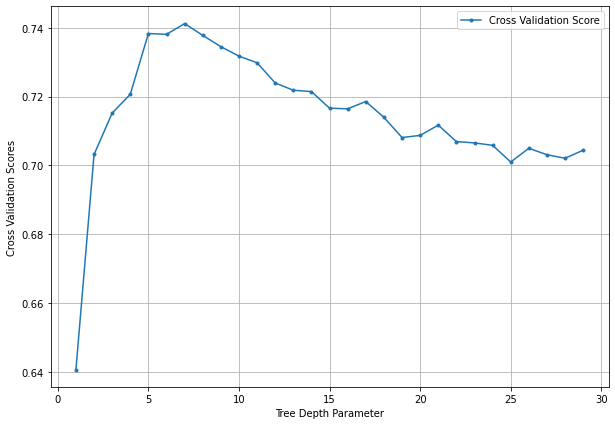

The best model has depth =  7


In [61]:
cross_validation_scores = []

depth_values = list(range(1, 20, 1))

for depth in depth_values:
    tree_model = DecisionTreeClassifier(max_depth = depth)
    cv_score = np.mean(cross_val_score(tree_model, X_train, y_train, cv = 5))
    cross_validation_scores.append(cv_score)

plt.figure(figsize=(10, 7))
plt.plot(depth_values, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xlabel('Tree Depth Parameter')
plt.ylabel('Cross Validation Scores')
plt.grid()
plt.show()

index_of_max_depth = np.argmax(cross_validation_scores)
print("The best model has depth = ", depth_values[index_of_max_depth])

After adding the Seasonality as a new feature to the dataset and re-performing the 5-fold cross validation on the Decision Tree model, the new model's optimal depth that achieved the maximum accuracy on the validation set is 7.

In [62]:
tree_model = DecisionTreeClassifier(max_depth = depth_values[index_of_max_depth])
tree_model.fit(X_train, y_train)

# Score the model
print("Optimal Decision Tree Train accuracy:", tree_model.score(X_train, y_train))
print("Optimal Decision Tree Test accuracy:", tree_model.score(X_test, y_test))

Optimal Decision Tree Train accuracy: 0.776840131270511
Optimal Decision Tree Test accuracy: 0.7555659714084837


As seen from the model's score above, the Decision Tree model with Seasonality added as a new feature did not improve the model's accuracy from 75.6%. It seems adding the Seasons as a new feature did not add further insight into predicting the reviews sentiment.

In [63]:
# Getting the class predictions using the optimized Decision Tree model
y_pred = tree_model.predict(X_test)

# Creating the confusion matrix 
cf_matrix = confusion_matrix(y_test, y_pred)
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Class 0", "True Class 1"]
)

display(cf_df)

# Creating the confusion matrix 
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix = np.round(cf_matrix/len(y_test), 3)
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Class 0", "True Class 1"]
)

print("Normalized Confusion Matrix")
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Class 0,1284,525
True Class 1,518,1940


Normalized Confusion Matrix


,Predicted Class 0,Predicted Class 1
True Class 0,0.301,0.123
True Class 1,0.121,0.455


## Conclusion

In this deliverable, I developed several machine learning models aiming to correctly label the sentiment of the hotel reviews data. This included creating a baseline Logistic Regression model, KNN model and a Decision Tree model, in addition to hyperparameter tuning. The results obtained can be summarized below:

- Baseline Logistic Regression model accuracy - 73.3%
- Baseline KNN model (n_neighbors = 5) accuracy - 63.7%
- Optimal KNN model (n_neighbors = 21) accuracy - 68.8%
- Baseline Decision Tree accuracy - 69.9%
- Optimal Decision Tree (max_depth = 7) accuracy - 75.6%

Overall, the best performance of 75.6% accuracy was obtained using the optimized Decision Tree with max_depth parameter of 7.